In [1]:
# Necessary libraries

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
!pip install mglearn
import mglearn
from sklearn import metrics
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Dataset link
url_red ="https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

In [3]:
# Dataset import
data_red = pd.read_csv(url_red, sep=";")
data_white = pd.read_csv(url_white, sep= ";")

In [4]:
#data_red.head()
#data_white.head()

In [5]:
# new coloumn
data_red["wine type"]=1
data_white["wine type"]=0

In [6]:
data = pd.concat([data_red, data_white], axis=0)

### Regression

In [7]:
# Setting X and y
X = data.drop("alcohol", axis=1).values
y = data["alcohol"].values

In [8]:
# Dataset split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
# Scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso ( GridSearchCV)

In [11]:
from sklearn.linear_model import Lasso

In [12]:
param_grid= [{"alpha":[1,0.0,0.1,0.01,0.001]}]

In [13]:
grid_search= GridSearchCV(Lasso(), param_grid, cv=5)

In [14]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': [1, 0.0, 0.1, 0.01, 0.001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best CV score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 0.0}
Best CV score: 0.85


In [16]:
print("Best estimator: \n{} ".format(grid_search.best_estimator_))

Best estimator: 
Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) 


For the last score of lasso was 0 and now due to using GridsearchCV we get the cv score is about 0.85

# Binary Classification

In [17]:
# setting the target 
X = data.iloc[:,:12].values
y = data.iloc[:,12].values

In [18]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
# Scalling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [21]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,99]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.99
Best parameters: {'C': 1}
Best cross-validation score: 0.99

Best estimator:
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


The score is same as the last one.

# Multiclass Classifier

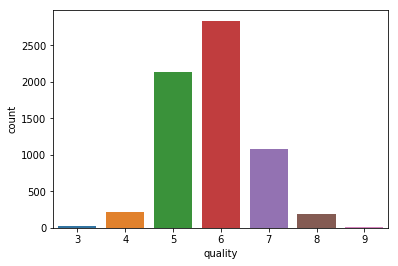

In [22]:
# Categorical distribution
    # Poor quality score 0 to 4 = 0
    # Good quality score 5 to 7 = 1
    # Best quality score 8 to 10 = 2
bars = [0,4,7,10]
quality_labels = [0,1,2]
data["quality_status"] = pd.cut(data["quality"], bins=bars, labels = quality_labels, include_lowest=True)
sns.countplot(data["quality"])
plt.show()

In [23]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine type', 'quality_status'],
      dtype='object')

In [24]:
X = data.drop(["quality", "quality_status"], axis=1)
y = data.iloc[:,13]

In [25]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc=  RandomForestClassifier(n_estimators=200, random_state=0)

In [28]:
grid_param = grid_param = {  
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]}

In [24]:
grid_search = GridSearchCV(rfc,grid_param,'accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.84
Best parameters: {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 500}
Best cross-validation score: 0.85

Best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


# SVC

In [25]:
svc= SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [30]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,99],
              'kernel':['linear','rbf'],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))

Test set score: 1.00
Best parameters: {'C': 99, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 1.00



In [32]:
svc2 = SVC(C = 1.1, gamma =  0.1, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00      1588
          1       0.99      0.98      0.99       557

avg / total       0.99      0.99      0.99      2145



In [59]:
# Results in DataFrame
results = pd.DataFrame(grid_search.cv_results_)

C:\Users\Omistaja\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Omistaja\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Omistaja\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Omistaja\Anaconda3\lib\site-packages\sk

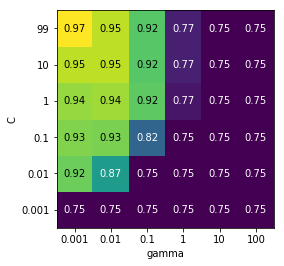

In [62]:
scores = np.array(results.mean_test_score).reshape(len(param_grid['C']), len(param_grid['gamma']))
# the mean cross-validation scores ploting
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

# ROC

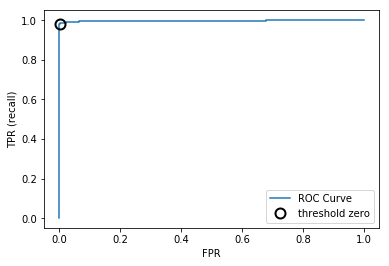

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve") 
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero 
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,         
         label="threshold zero", fillstyle="none", c='k', mew=2) 
plt.legend(loc=4)


### AUC

In [79]:
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test)) 
print("AUC for SVC: {:.3f}".format(svc_auc))


AUC for SVC: 0.997


### 3.  SVC with AUC 

In [89]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,99],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(), param_grid,scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 1.00
Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 1.00

Best estimator:
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [91]:
from sklearn.cross_validation import cross_val_score
cross_val_score(SVC(), X=X_train, y= y_train, cv=5, scoring='roc_auc').mean()

0.9972789235728495

CV score is about same but AUC revealed better parametres.